In [1]:
from impy import models as im
from impy.kinematics import CenterOfMass
from impy.constants import GeV
from impy.util import get_all_models
from particle import literals as lp
import numpy as np
import joblib

In [2]:
energies = np.geomspace(10, 1000, 20) * GeV

@joblib.delayed
def run(Model):
    values = []
    m = Model(CenterOfMass(energies[0], "p", "p"))
    for en in energies:
        kin = CenterOfMass(en, "p", "p")
        c = m.cross_section(kin)
        values.append(c)
    return values

Models = [M for M in get_all_models() if lp.proton.pdgid in M.projectiles]
cross_sections = {}
out = joblib.Parallel(len(Models))(run(Model) for Model in Models)
for Model, o in zip(Models, out):
    cross_sections[Model.pyname] = o

 +-----------------------------------------------------------------------+
 |                                                                       |
 |                       DPMJET-III version 19.1.3                       |
 |                                                                       |
 |                      (Last change:  01 Sep 2022)                      |
 |                                                                       |
 |            Authors:                                                   |
 |                     Stefan Roesler     (CERN)                         |
 |                     Anatoli Fedynitch  (ICRR)                         |
 |                     Ralph Engel        (KIT)                          |
 |                     Johannes Ranft     (Siegen Univ.)                 |
 |                                                                       |
 |        https://github.com/afedynitch/dpmjet                           |
 |                       

/Users/hdembinski/Extern/impy/src/impy/models/urqmd.py:202: RuntimeWarning: 13 unknown to UrQMD
  warnings.warn(f"{pdgid} unknown to UrQMD", RuntimeWarning)
/Users/hdembinski/Extern/impy/src/impy/models/urqmd.py:202: RuntimeWarning: 130 unknown to UrQMD
  warnings.warn(f"{pdgid} unknown to UrQMD", RuntimeWarning)
/Users/hdembinski/Extern/impy/src/impy/models/urqmd.py:202: RuntimeWarning: 310 unknown to UrQMD
  warnings.warn(f"{pdgid} unknown to UrQMD", RuntimeWarning)
/Users/hdembinski/Extern/impy/src/impy/models/urqmd.py:202: RuntimeWarning: -13 unknown to UrQMD
  warnings.warn(f"{pdgid} unknown to UrQMD", RuntimeWarning)


 PHO_EVENT: Error, initialzation (-1) called twice.


        pT0 = 0.55 GeV gives sigma(parton-parton) = 5.83D+01 mb: accepted

 ********************** PYINIT: initialization completed **********************
1****************** PYINIT: initialization of PYTHIA routines *****************

 I                                                                            I
 I              PYTHIA will be initialized for a p on p collider              I
 I                  at     33.598 GeV center-of-mass energy                   I
 I                                                                            I

 ******** PYMAXI: summary of differential cross-section maximum search ********

           I                                      I                 I
           I  ISUB  Subprocess name               I  Maximum value  I
           I                                      I                 I
           I                                      I                 I
           I   92   Single d

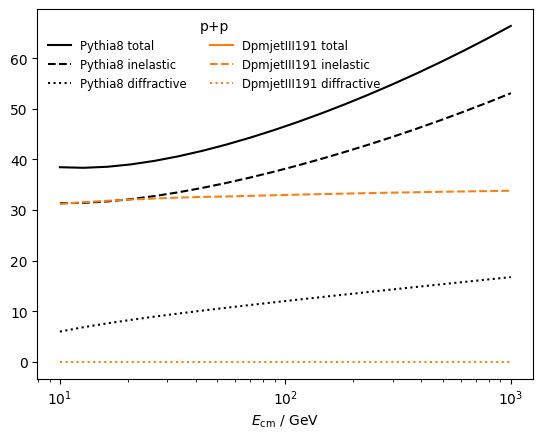

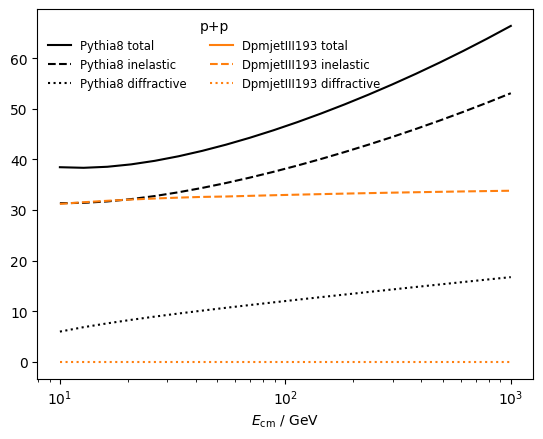

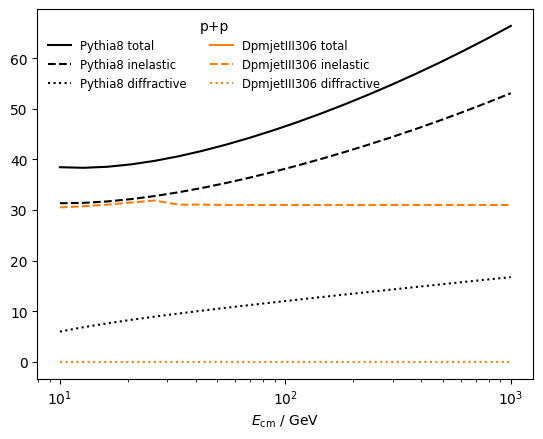

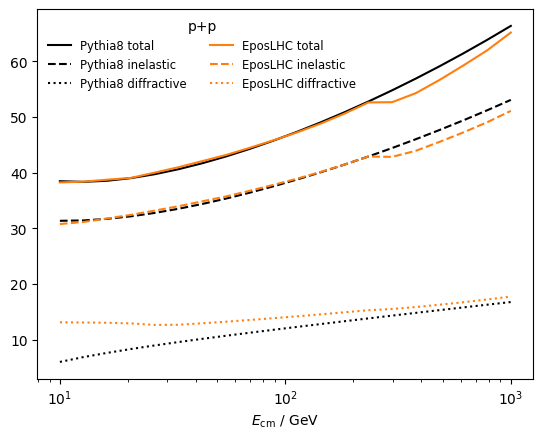

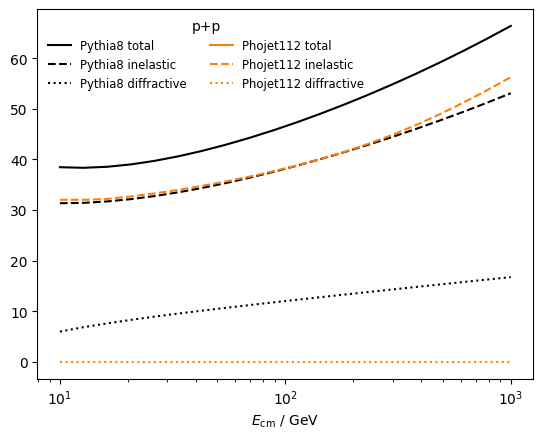

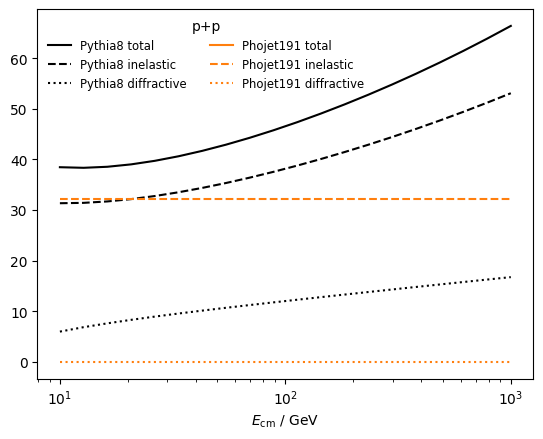

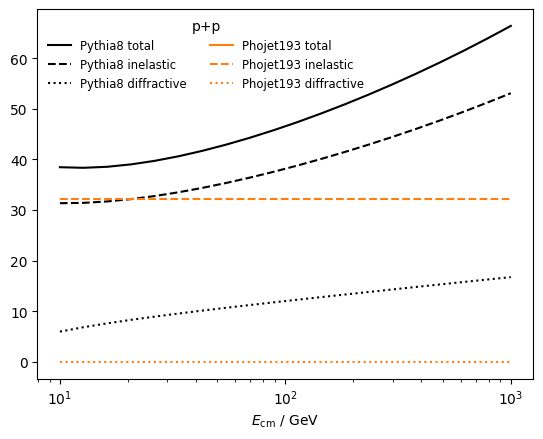

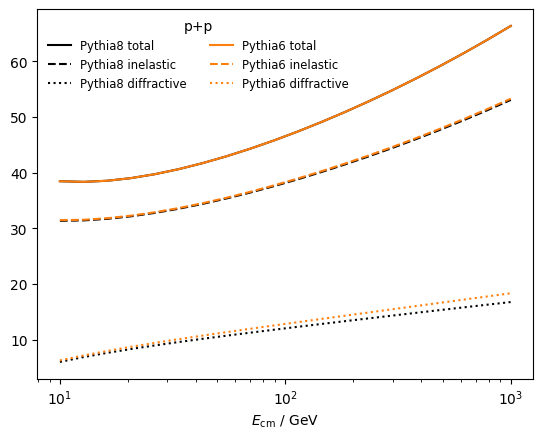

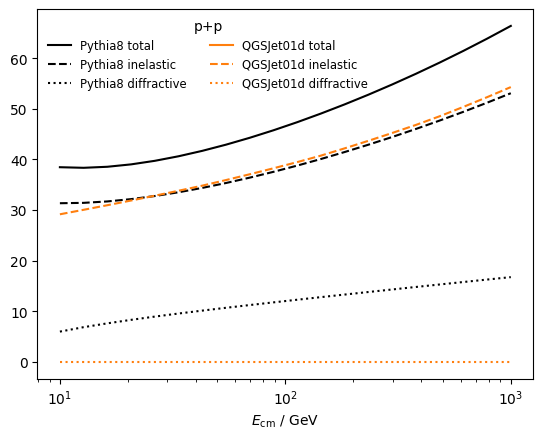

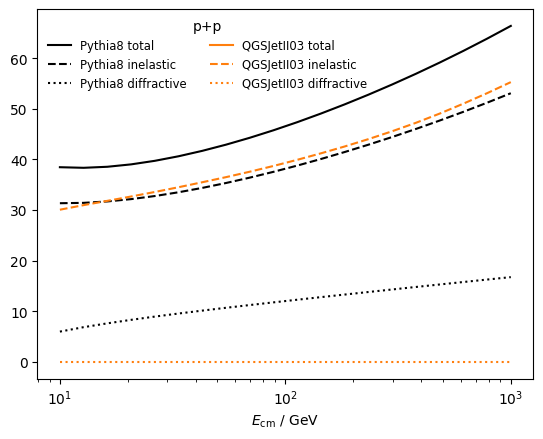

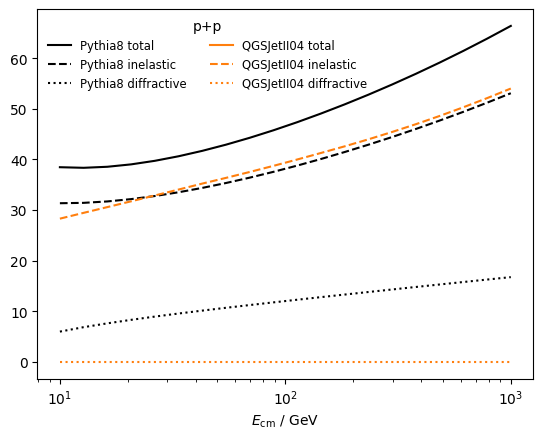

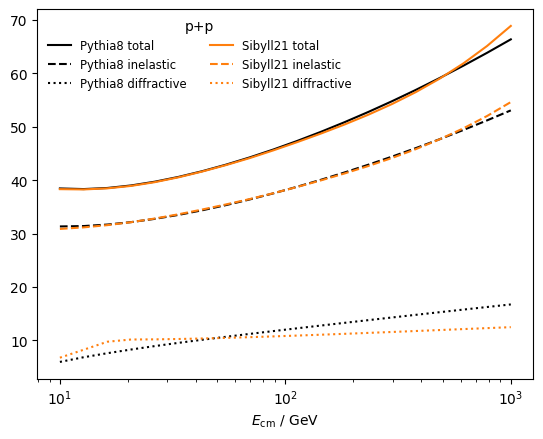

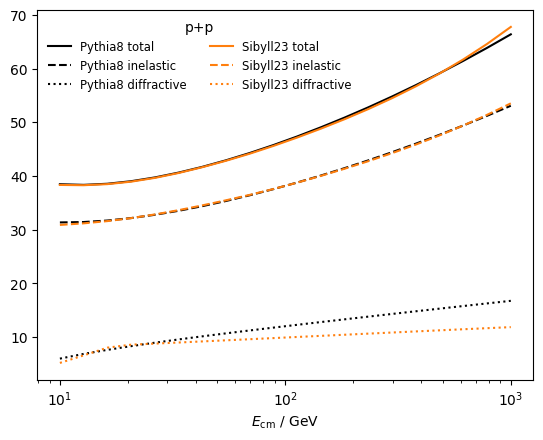

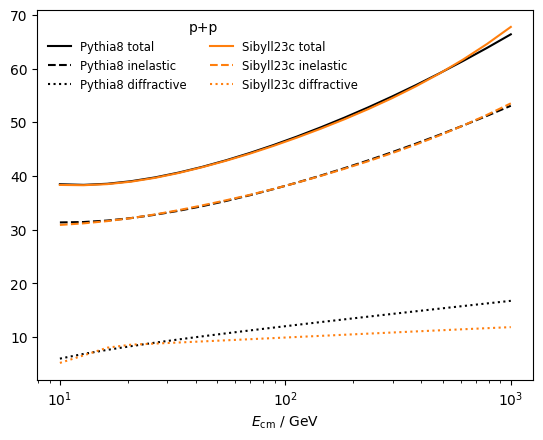

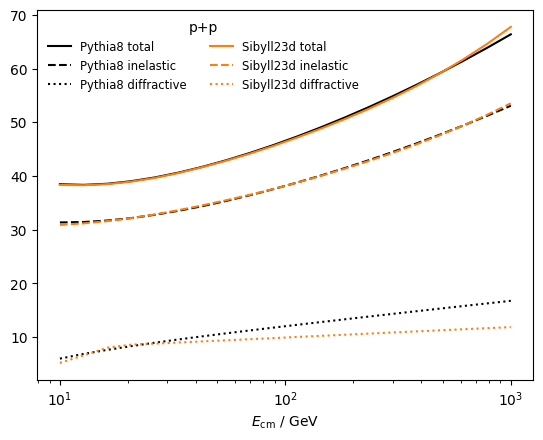

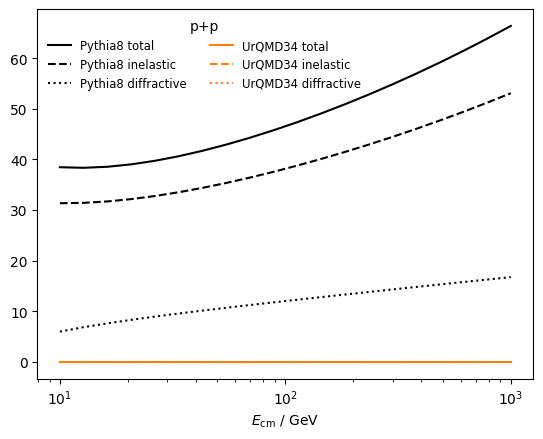

In [23]:
from matplotlib import pyplot as plt
import dataclasses

for model in cross_sections:
    if model == "Pythia8":
        continue
    plt.figure()
    kinds = "total", "inelastic", "diffractive"
    for k, model2 in enumerate(("Pythia8", model)):
        data = cross_sections[model2]
        for i, kind in enumerate(kinds):
            if kind == "diffractive":
                val = [sum(
                    (0 if np.isnan(v) else v) for k, v in dataclasses.asdict(d).items() if "diffractive" in k) for d in data]
            else:
                val = [getattr(d, kind) for d in data]

            plt.plot(energies / GeV, val, label=model2 + " " + kind,
                    ls=["-", "--", ":"][i], color=["k", "C1"][k], zorder=1 + k)
    plt.semilogx()
    plt.legend(frameon=False, ncol=2, fontsize="small", title="p+p")
    plt.xlabel("$E_\\mathrm{cm}$ / GeV");